In [1]:
import sys
sys.path.append('../')
import src.utils as utils
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
reload(utils)
import scipy.stats as stat
from scipy.interpolate import interp1d 

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = "retina"

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
np.random.seed(2)

## A simple process

### The process below will have the following time partition:
$$
t_i = i\,,
$$
and for $t\in (t_{i-1}, t_i]$, the process $\alpha_t = W_{t_{i-1}}$.

In [5]:
BM = utils.BrownianMotion(T = 5., Nt = 20_000)
paths = BM.simulate(nsims = 3)
times = BM.timesteps

In [6]:
def alpha_example(times, path):
    get_point = interp1d(times, path, kind ='previous')
    times_to_check = np.arange(start = times[0], stop = times[-1]+1e-5, step = 0.2)
    W_at_times_to_check = get_point(times_to_check)
    get_point = interp1d(times_to_check, W_at_times_to_check, kind ='previous')
    alpha = get_point(times)
    return alpha

In [7]:
alpha = np.zeros_like(paths)
for i in range(alpha.shape[1]):
    alpha_aux = alpha_example(times, paths[:,i])
    idx = np.argwhere(np.abs(np.diff(alpha_aux))>0.001)
    alpha_aux[idx] = np.nan
    alpha[:,i] = alpha_aux

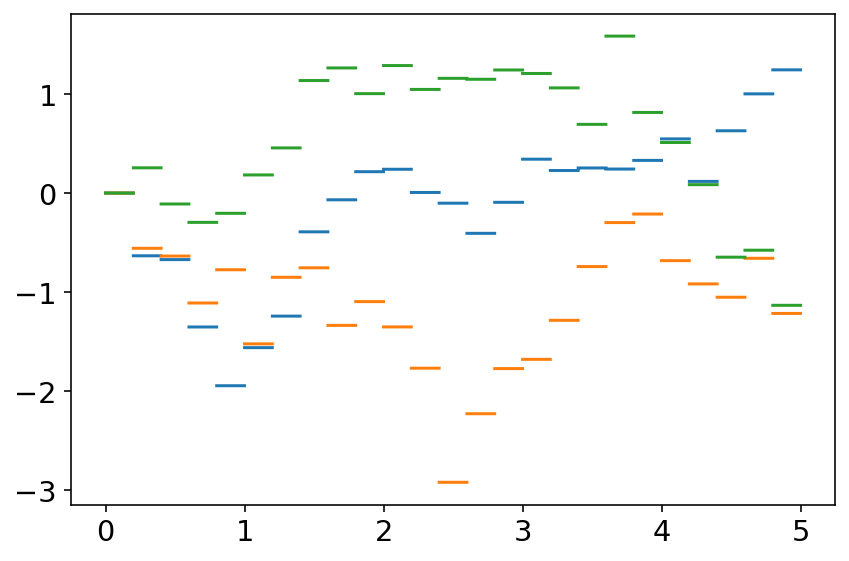

In [8]:
plt.figure()
plt.plot(times, alpha, linestyle = '-')
resolution_value = 50
plt.tight_layout()
#plt.savefig('../figures/simple_process.pdf', format="pdf", dpi=resolution_value)
plt.show()

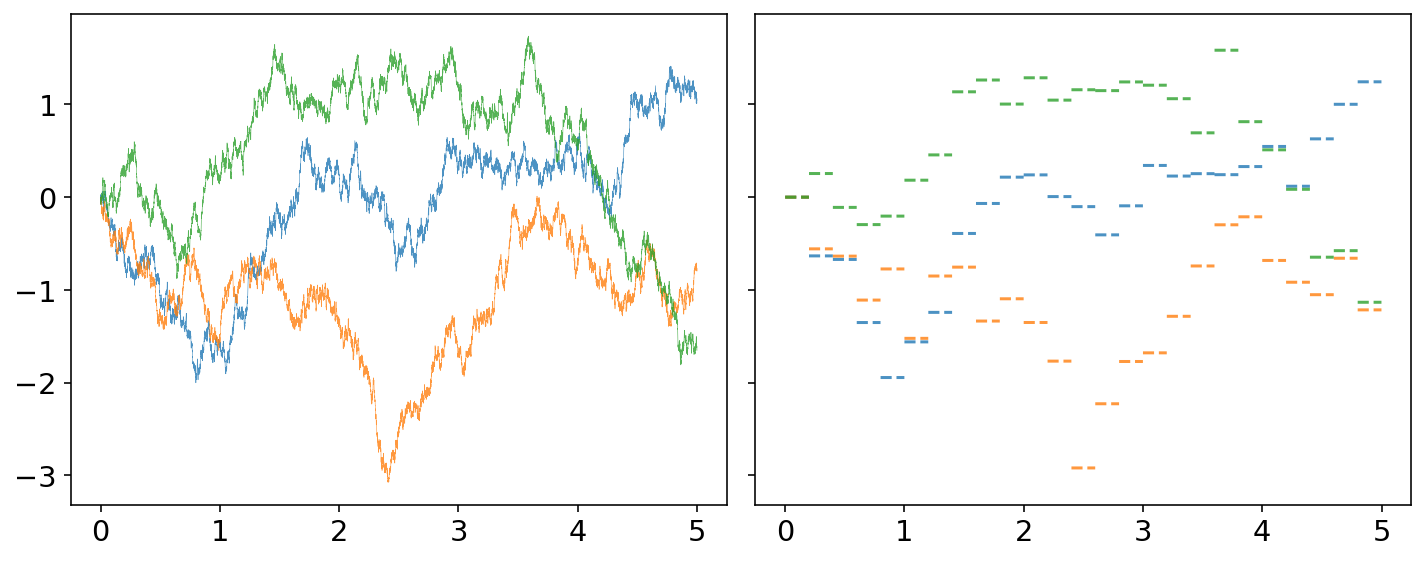

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
fig.tight_layout(pad=3)
ax[0].plot(times, paths, linestyle = '-', linewidth = 0.3, alpha = 0.8)
ax[1].plot(times, alpha, linestyle = '--', alpha = 0.8)
resolution_value = 50
plt.tight_layout()
plt.savefig('../figures/simple_process_and_BM.pdf', format="pdf", dpi=resolution_value)
plt.show()